Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.

In [1]:
x_bar = 50 
std = 5
confidence_level = 0.95
significance_level = 0.05

lets consider sample size =30

In [2]:
import scipy.stats as stat
stat.t.interval(alpha = confidence_level, df = 30-1, loc = x_bar, scale = std)

/tmp/ipykernel_187/843223468.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stat.t.interval(alpha = confidence_level, df = 30-1, loc = x_bar, scale = std)


(39.77385178933648, 60.22614821066352)

Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.

Null Hypothesis : The distribution of colors of M&Ms in a bag matches the expected distribution.

Alternate Hypothesis : The distribution of colors of M&Ms in a bag does not matches the expected distribution.

In [3]:
import pandas as pd
# lets consider observed data : 27,24,12,14,9,20
df = pd.DataFrame({"colors" : ["blue", "orange" , "green", "yellow","red","brown"],"percentage" : [20,20,20,10,10,20], "Observed Data" : [27,24,12,14,9,20]})

In [4]:
significance_level = 0.05
df

,colors,percentage,Observed Data
0,blue,20,27
1,orange,20,24
2,green,20,12
3,yellow,10,14
4,red,10,9
5,brown,20,20


In [5]:
Total = sum(df['Observed Data'])
df['Expected Data'] = (df['percentage']*Total)/100

In [6]:
df

,colors,percentage,Observed Data,Expected Data
0,blue,20,27,21.2
1,orange,20,24,21.2
2,green,20,12,21.2
3,yellow,10,14,10.6
4,red,10,9,10.6
5,brown,20,20,21.2


In [7]:
#Chi-square Goodness of Fit test
chi_square_test_statistic,p_value = stat.chisquare(df['Observed Data'], df['Expected Data'])
chi_square_test_statistic,p_value

(7.349056603773584, 0.1959476434216094)

In [8]:
# find the critical value
dof = len(df['Expected Data'])-1
critical_value = stat.chi2.ppf(1-significance_level,dof)
critical_value

11.070497693516351

In [9]:
if chi_square_test_statistic > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

Interpret the results of the test.

In [10]:
df1 = pd.DataFrame({"Group A" : [20,10,15], "Group B" : [15,25,20]},index = ["Outcome 1", "Outcome 2", "Outcome 3"])

In [11]:
df1

,Group A,Group B
Outcome 1,20,15
Outcome 2,10,25
Outcome 3,15,20


In [12]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df1)
stat, p, dof, expected


(5.833333333333334,
 0.05411376622282158,
 2,
 array([[15., 20.],
        [15., 20.],
        [15., 20.]]))

Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.

In [13]:
n = 500
population_smokes = 60
p = population_smokes/n
p

0.12

In [14]:
#for 95% confidence,
z_score = 1.96

In [15]:
from math import sqrt
lower_limit = population_smokes - (z_score*sqrt((p*(1-p))/n))
upper_limit = population_smokes + (z_score*sqrt((p*(1-p))/n))
lower_limit,upper_limit

(59.97151586546865, 60.02848413453135)

In [16]:
print("The 95% confidence interval for the true proportion of individuals in the population who smoke is between", lower_limit,"and",upper_limit)

The 95% confidence interval for the true proportion of individuals in the population who smoke is between 59.97151586546865 and 60.02848413453135


Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python.

In [17]:
confidence_level = 0.90
x_bar = 75
std = 12

lets consider n = 50

In [18]:
#for 90% confidence interval, 
z_score = 1.645

In [19]:
ll = x_bar - ((z_score*std)/sqrt(50))
ul = x_bar + ((z_score*std)/sqrt(50))
ll,ul

(72.20834242787551, 77.79165757212449)

In [20]:
print("The 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 is between",ll,"and",ul)

The 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 is between 72.20834242787551 and 77.79165757212449


Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

In [21]:
df = 10
chi_square_statistic = 15

In [22]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt 

In [23]:
x = np.linspace(0,30,300)

In [24]:
y = chi2.pdf(x,df=10)

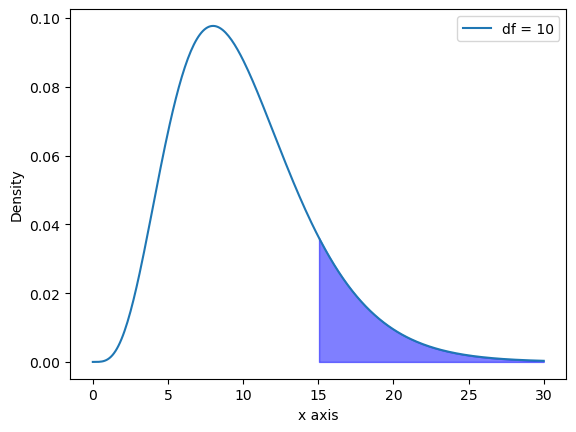

In [25]:
plt.plot(x,y,label = "df = 10")
plt.fill_between(x,y,color='blue',alpha=0.5,where = x > 15)
plt.ylabel('Density')
plt.xlabel('x axis')
plt.legend()
plt.show()

Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

In [26]:
n = 1000
liked_coke = 520
p = liked_coke/n
p

0.52

In [27]:
#for 99% confidence,
z_score = 2.575

In [28]:
from math import sqrt
lower_limit = liked_coke - (z_score*sqrt((p*(1-p))/n))
upper_limit = liked_coke + (z_score*sqrt((p*(1-p))/n))
lower_limit,upper_limit

(519.9593182596243, 520.0406817403757)

Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

Null hypothesis : The observed frequencies match the expected frequencies of a fair coin

Alternate hypothesis : The observed frequencies didnt match the expected frequencies of a fair coin

In [29]:
# no of tails and no of heads observation:
observed_data = [45,55]
expected_data = [50,50]
n =100

In [30]:
import scipy.stats as stats
chi_square_test_statistic, p_value = stats.chisquare( 
    observed_data, expected_data) 
chi_square_test_statistic,p_value

(1.0, 0.31731050786291115)

In [31]:
significance_value = 0.05
dof = len(expected_data)-1
critical_value = stats.chi2.ppf(1-significance_value,dof)
critical_value

3.841458820694124

In [32]:
if chi_square_test_statistic > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

Use a significance level of 0.05.

In [33]:
df2 = pd.DataFrame({"Lung Cancer:Yes":[60,30],"Lung Cancer:No":[140,170]},index = ["Smoker","Non-smoker"])

In [34]:
df2

,Lung Cancer:Yes,Lung Cancer:No
Smoker,60,140
Non-smoker,30,170


Null Hypothesis : There is a significant association between
smoking status and lung cancer diagnosis.

Alternate Hypothesis : There is no significant association between
smoking status and lung cancer diagnosis.


In [35]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df2)
stat, p, dof, expected

(12.057347670250895,
 0.0005158863863703744,
 1,
 array([[ 45., 155.],
        [ 45., 155.]]))

In [36]:
significance_value = 0.05
critical_value = stats.chi2.ppf(1-significance_value,1)
critical_value

3.841458820694124

In [51]:
if stat > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin.

Use a significance level of 0.01.

In [38]:
df3 = pd.DataFrame({"Milk Chocolate":[200,225],"Dark Chocolate":[150,175],"White Chocolate":[150,100]},index = ["U.S.(n=500)","U.K.(n=500)"])

In [39]:
df3

,Milk Chocolate,Dark Chocolate,White Chocolate
U.S.(n=500),200,150,150
U.K.(n=500),225,175,100


Null hypothesis : There is a significant
association between chocolate preference and country of origin.

Alternate hypothesis : There is no significant
association between chocolate preference and country of origin.

In [40]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df3)
stat, p, dof, expected

(13.393665158371041,
 0.0012348168997745918,
 2,
 array([[212.5, 162.5, 125. ],
        [212.5, 162.5, 125. ]]))

In [41]:
significance_value = 0.01
critical_value = stats.chi2.ppf(1-significance_value,2)
critical_value

9.21034037197618

In [50]:
if stat > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

In [43]:
import numpy as np 
data =np.linspace(10,100,30)

In [44]:
mean1 = np.mean(data)
std1 = np.std(data)
mean1,std1

(54.999999999999986, 26.86171483985955)

In [45]:
df4 =pd.DataFrame({"Mean":[72,mean1] ,"Standard deviation" :[10,std1]}, index = ["observed","expected"])

In [46]:
df4

,Mean,Standard deviation
observed,72.0,10.000000
expected,55.0,26.861715


Null hypothesis : The population mean is significantly different from 70.

Alternate hypothesis : The population mean is same as 70.

In [47]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df4)
stat, p, dof, expected

(8.840984704902045,
 0.0029454018485928443,
 1,
 array([[63.55358853, 18.44641147],
        [63.44641147, 18.41530337]]))

In [48]:
significance_value = 0.05
critical_value = stats.chi2.ppf(1-significance_value,1)
critical_value

3.841458820694124

In [49]:
if stat > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
